# Intro. Analysis of salary in Data Science

This dataset is about salary of DAta Scientist. The **sd_salary.csv** data set includes details of 606 Data Scientists with there experience level, salary, job title and a lot of date :

| Field             | Description                                                                                                                                       |
| ------------------| --------------------------------------------------------------------------------------------------------------------------------------------------|
| Work_year         | The year the salary was paid.                                                                                                                     |
| Experience_level  | The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-| |                   |level / Expert EX Executive-level / Director                                                                                                       |
| Employment type   | The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance                                                          |
| Job title         | The role worked in during the year.                                                                                                               |
| Salary            | The total gross salary amount paid.                                                                                                               |
| Salary_currency   | The currency of the salary paid as an ISO 4217 currency code.                                                                                     |
| Salaryinusd       | The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com)                                              |
| Employee residence| Employee's primary country of residence in during the work year as an ISO 3166 country code.                                                      |
| Remote ratio      | The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote     |                   |(more than 80%)                                                                                                                                    |
| Company location  | The country of the employer's main office or contracting branch as an ISO 3166 country code.                                                      |
| Company size      | The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more  | |                   |than 250 employees (large)                                                                                                                         |

In [18]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 2.0 MB/s eta 0:00:01


In [23]:
!pip install chart_studio

     |████████████████████████████████| 64 kB 612 kB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=2cf46c5181f754e8263629d0a3434a4bb309cfb1aa13052684d99cc4e085fb25
  Stored in directory: /Users/sayan/Library/Caches/pip/wheels/ce/18/7f/e9527e3e66db1456194ac7f61eb3211068c409edceecff2d31
Successfully built retrying


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import chart_studio.plotly as py

In [28]:
ds_salary_data = pd.read_csv('/Users/sayan/Documents/Kaggle_repo/ds_dalaries/ds_salaries.csv', index_col = 0)
ds_salary_data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [5]:
ds_salary_data.shape

(607, 11)

In [8]:
ds_salary_data.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [10]:
ds_salary_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [11]:
ds_salary_data.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [14]:
#Lets replace values to understand what is it on graphs
ds_salary_data.remote_ratio .replace([100, 50, 0], ['Remore', 'Hybrid', 'On-site'], inplace = True)
ds_salary_data.experience_level.replace(['EN', 'MI', 'SE', 'EX'], ['Entry', 'Mid', 'Senior', 'Executive'], inplace = True)

In [56]:
ds_salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JP,On-site,JP,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GB,Hybrid,GB,M
3,2020,Mid,FT,Product Data Analyst,20000,USD,20000,HN,On-site,HN,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,US,Hybrid,US,L


Lets check employees remote ratio

In [38]:
#fig = px.histogram(ds_salary_data, x = 'remote_ratio', color = 'work_year', barmode = 'group', color_discrete_sequence = px.colors.qualitative.Pastel, 
#             template = 'plotly_dark', title = 'Each Work Type')
#fig.show()

<AxesSubplot:xlabel='remote_ratio', ylabel='Count'>

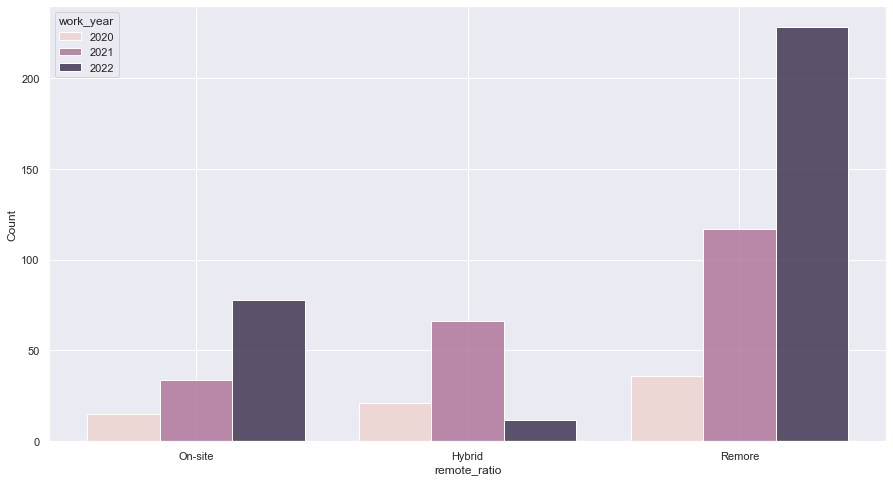

In [69]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.histplot(data = ds_salary_data, x = 'remote_ratio', hue = 'work_year', multiple = 'dodge', shrink=.8)

<AxesSubplot:xlabel='company_size', ylabel='Count'>

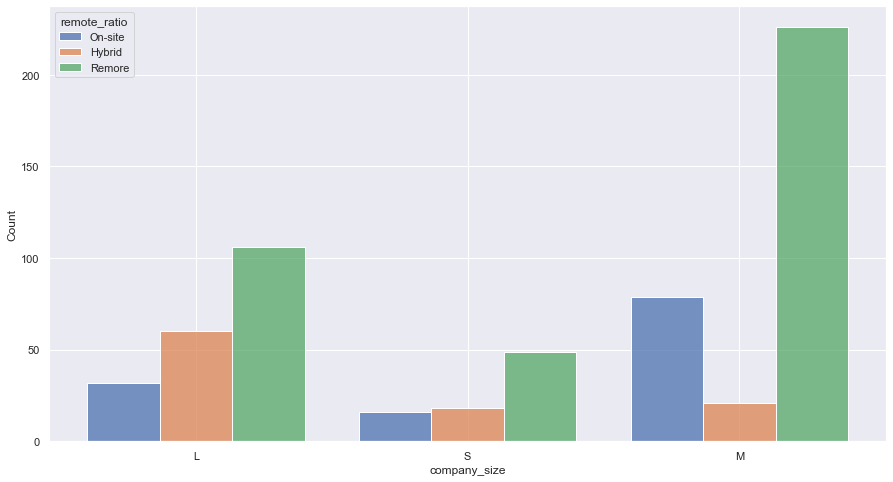

In [70]:
sns.histplot(data = ds_salary_data, x = 'company_size', hue = 'remote_ratio', multiple = 'dodge', shrink=.8)

In [78]:
ds_salary_data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [91]:
filter_job_title = ['Data Scientist', 'Data Analyst', 'Data Engineer']
ds_da_salary = ds_salary_data[ds_salary_data.job_title.isin(filter_job_title)]

In [93]:
ds_da_salary.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,70000,EUR,79833,DE,On-site,DE,L
5,2020,Entry,FT,Data Analyst,72000,USD,72000,US,Remore,US,L
7,2020,Mid,FT,Data Scientist,11000000,HUF,35735,HU,Hybrid,HU,L
10,2020,Entry,FT,Data Scientist,45000,EUR,51321,FR,On-site,FR,S
11,2020,Mid,FT,Data Scientist,3000000,INR,40481,IN,On-site,IN,L
12,2020,Entry,FT,Data Scientist,35000,EUR,39916,FR,On-site,FR,M
14,2020,Mid,FT,Data Analyst,85000,USD,85000,US,Remore,US,L
15,2020,Mid,FT,Data Analyst,8000,USD,8000,PK,Hybrid,PK,L
16,2020,Entry,FT,Data Engineer,4450000,JPY,41689,JP,Remore,JP,S
22,2020,Senior,FT,Data Engineer,42000,EUR,47899,GR,Hybrid,GR,L


<AxesSubplot:xlabel='salary_in_usd', ylabel='job_title'>

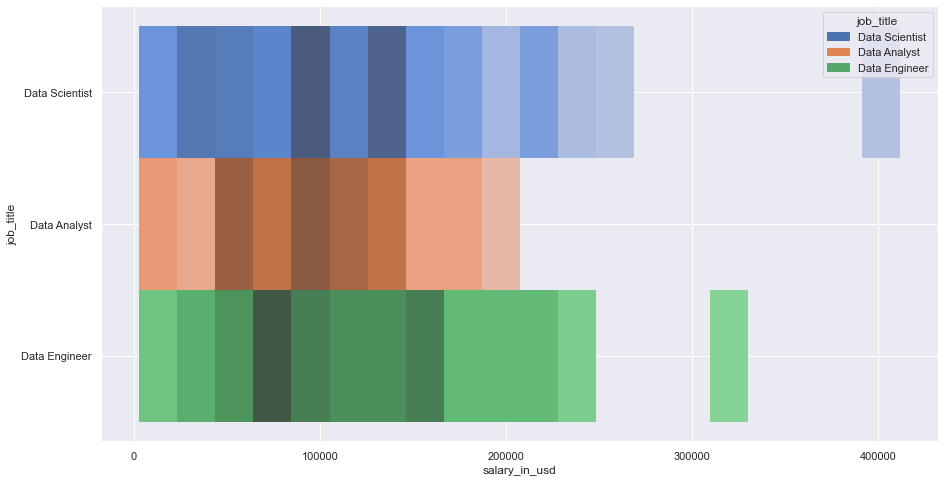

In [103]:
sns.histplot(data = ds_da_salary, x = 'salary_in_usd', y='job_title', hue = 'job_title', multiple = 'dodge', shrink=.8)